In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv("../data/merged_data.csv")
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)


#### Using minmax only

In [17]:
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv("merged_data.csv")

data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

# Normalize features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data.drop(columns=["Recession"]))
scaled_data = pd.DataFrame(scaled_features, columns=data.columns[:-1], index=data.index)
scaled_data['Recession'] = data['Recession']  

data = scaled_data


#### Using standard

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
data = pd.read_csv("merged_data.csv")
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE')

# Separate columns for different scalers
standard_scaler_columns = ['gdp_percent_change', 'inflation_percent_change', 'overall_rate']
min_max_scaler_columns = [col for col in data.columns if col not in standard_scaler_columns + ['DATE', 'Recession']]

# Apply StandardScaler to selected columns
standard_scaler = StandardScaler()
data[standard_scaler_columns] = standard_scaler.fit_transform(data[standard_scaler_columns])

# Apply MinMaxScaler to the remaining columns (except target and date)
min_max_scaler = MinMaxScaler()
data[min_max_scaler_columns] = min_max_scaler.fit_transform(data[min_max_scaler_columns])

# Check the processed data to ensure proper scaling
data.head()

,DATE,gdp_percent_change,inflation_percent_change,overall_rate,LongTermRate,Slope,ZeroCouponYield1Y,ZeroCouponYield10Y,Recession
0,1967-11-30,1.244767,0.808526,-1.236726,0.231217,0.488572,0.335715,0.397180,0.0
1,1967-12-31,1.232101,-0.108367,-1.294297,0.230364,0.513853,0.343295,0.397440,0.0
2,1968-01-31,1.219605,-0.111032,-1.351867,0.222088,0.495640,0.325339,0.386713,0.0
3,1968-02-29,0.905411,-0.113681,-1.294297,0.225851,0.667926,0.324137,0.390219,0.0
4,1968-03-31,0.896902,-0.116315,-1.351867,0.230158,1.000000,0.332694,0.398641,0.0


In [24]:
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE')

,gdp_percent_change,inflation_percent_change,overall_rate,LongTermRate,Slope,ZeroCouponYield1Y,ZeroCouponYield10Y,Recession
DATE,,,,,,,,
1967-11-30,1.244767,0.808526,-1.236726,0.231217,0.488572,0.335715,0.397180,0.0
1967-12-31,1.232101,-0.108367,-1.294297,0.230364,0.513853,0.343295,0.397440,0.0
1968-01-31,1.219605,-0.111032,-1.351867,0.222088,0.495640,0.325339,0.386713,0.0
1968-02-29,0.905411,-0.113681,-1.294297,0.225851,0.667926,0.324137,0.390219,0.0
1968-03-31,0.896902,-0.116315,-1.351867,0.230158,1.000000,0.332694,0.398641,0.0
...,...,...,...,...,...,...,...,...
2023-02-28,-0.072830,0.122081,-1.409437,0.046449,0.599616,0.306718,0.225036,0.0
2023-03-31,-0.073957,-0.851569,-1.467007,0.150546,0.531193,0.293345,0.222180,0.0
2023-04-30,-0.075080,0.115255,-1.524578,0.170184,0.539304,0.284860,0.207008,0.0


In [37]:
import numpy as np
# Redefine the train-test split
#data['DATE'] = pd.to_datetime(data['DATE'])
train_data = data.iloc[:521] # 521 2004-11-31, 462 1999
test_data = data.iloc[522:]

X_train, y_train = train_data.drop(columns=['Recession']), train_data['Recession']
X_test, y_test = test_data.drop(columns=['Recession']), test_data['Recession']

# Verify that y_test has no NaN values
print("y_test NaNs:", y_test.isna().sum())

def create_sequences(features, target, window_size):
    X, y = [], []
    for i in range(len(features) - window_size):
        X.append(features.iloc[i:i + window_size].values)  # Use .iloc for row slicing
        y.append(target.iloc[i + window_size])  # Use .iloc for proper indexing
    return np.array(X), np.array(y)


# Create sequences
window_size = 8
X_train = X_train.select_dtypes(exclude=['datetime64[ns]'])
X_test = X_test.select_dtypes(exclude=['datetime64[ns]'])
X_train_seq, y_train_seq = create_sequences(X_train, y_train, window_size)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, window_size)

# Check the shapes of the generated sequences
print("X_train_seq shape:", X_train_seq.shape)
print("y_train_seq shape:", y_train_seq.shape)
print("X_test_seq shape:", X_test_seq.shape)
print("y_test_seq shape:", y_test_seq.shape)

y_test NaNs: 0
X_train_seq shape: (513, 8, 7)
y_train_seq shape: (513,)
X_test_seq shape: (138, 8, 7)
y_test_seq shape: (138,)


Epoch 1/100
17/17 [==============================] - 3s 51ms/step - loss: 0.5487 - accuracy: 0.7037 - val_loss: 0.1840 - val_accuracy: 0.9565
Epoch 2/100
17/17 [==============================] - 0s 10ms/step - loss: 0.3771 - accuracy: 0.8324 - val_loss: 0.1443 - val_accuracy: 0.9565
Epoch 3/100
17/17 [==============================] - 0s 10ms/step - loss: 0.3199 - accuracy: 0.8811 - val_loss: 0.1355 - val_accuracy: 0.9565
Epoch 4/100
17/17 [==============================] - 0s 10ms/step - loss: 0.3079 - accuracy: 0.8772 - val_loss: 0.1296 - val_accuracy: 0.9565
Epoch 5/100
17/17 [==============================] - 0s 10ms/step - loss: 0.2818 - accuracy: 0.8811 - val_loss: 0.1244 - val_accuracy: 0.9565
Epoch 6/100
17/17 [==============================] - 0s 10ms/step - loss: 0.2569 - accuracy: 0.8869 - val_loss: 0.1158 - val_accuracy: 0.9565
Epoch 7/100
17/17 [==============================] - 0s 10ms/step - loss: 0.2931 - accuracy: 0.8772 - val_loss: 0.1395 - val_accuracy: 0.9565
Epoch 

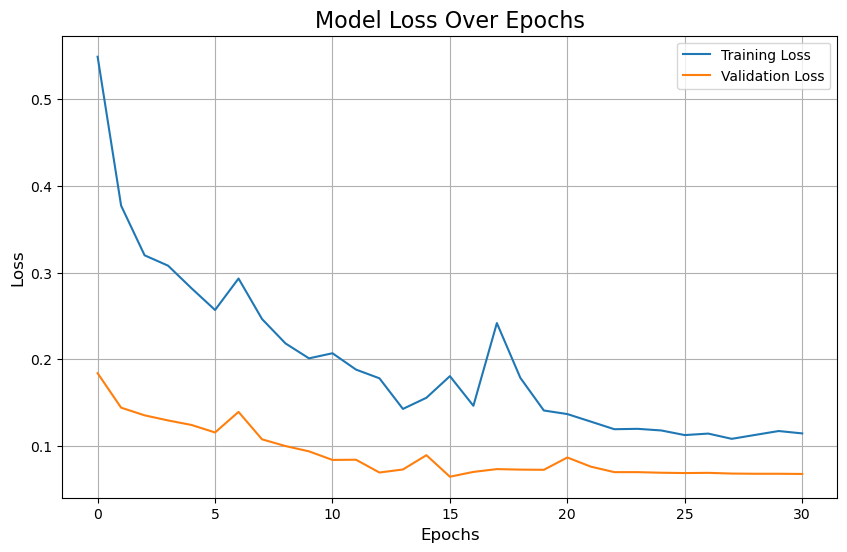

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)



# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_test_seq, y_test_seq),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate performance
print(history.history)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


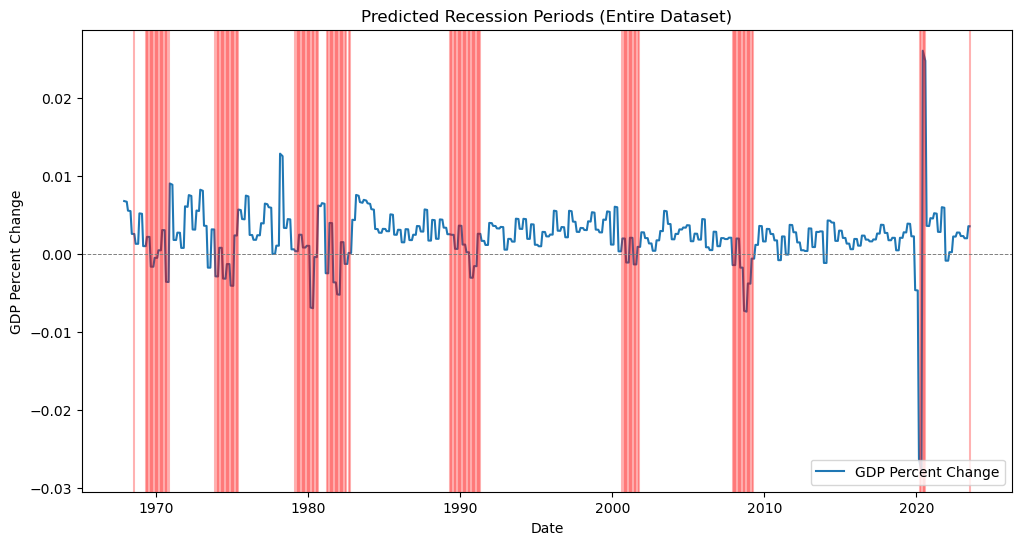

,Date,Recession Probability,Predicted Recession
0,1968-07-31,0.711035,1
1,1968-08-31,0.380353,0
2,1968-09-30,0.125249,0
3,1968-10-31,0.072133,0
4,1968-11-30,0.057757,0


In [39]:
# Redefine create_sequences function
def create_sequences(features, target, window_size):
    X, y = [], []
    for i in range(len(features) - window_size):
        X.append(features.iloc[i:i + window_size].values)
        y.append(target.iloc[i + window_size])  # Align target with the end of the sequence
    return np.array(X), np.array(y)

# Load and preprocess the dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assuming scaled_data and best_model exist, otherwise redefine them here
# Scale GDP, Inflation, Unemployment with StandardScaler
# Scale other features with MinMaxScaler

# Define window size
# Re-create sequences for the entire dataset

data = data.select_dtypes(exclude=['datetime64[ns]'])

X_full_seq, y_full_seq = create_sequences(
    data.drop(columns=['Recession']),
    data['Recession'],
    window_size
)

# Predict recession probabilities on the entire dataset
recession_probabilities_full = model.predict(X_full_seq)

# Convert probabilities to binary predictions (threshold = 0.5)
recession_predictions_full = (recession_probabilities_full >= 0.5).astype(int).flatten()

# Map predictions back to the original dates (align with window end dates)
recession_dates_full = data.index[window_size:]  # Dates corresponding to the sequences

# Create a DataFrame with predicted recession dates and probabilities
recession_results_full = pd.DataFrame({
    'Date': recession_dates_full,
    'Recession Probability': recession_probabilities_full.flatten(),
    'Predicted Recession': recession_predictions_full
})

# Visualize the results
import matplotlib.pyplot as plt


# Plot a relevant economic indicator (e.g., GDP)
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['gdp_percent_change'], label='GDP Percent Change')

# Highlight predicted recession periods
for date in recession_results_full.loc[recession_results_full['Predicted Recession'] == 1, 'Date']:
    plt.axvline(x=date, color='red', alpha=0.3)  # Vertical lines for recessions

# Add labels and legend
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # Zero line for reference
plt.title('Predicted Recession Periods (Entire Dataset)')
plt.xlabel('Date')
plt.ylabel('GDP Percent Change')
plt.legend()
plt.show()

# Display the first few rows of the results table
recession_results_full.head()
